In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import plotly.offline as py
import plotly.graph_objs as go
from matplotlib import pyplot
import scipy.signal
plt.rcParams['figure.figsize'] = 16, 16
%matplotlib inline
train = pd.read_json("./Data/train.json")
test = pd.read_json("./Data/test.json")

In [37]:
def sampleImg(train):
    #returns a random sample set of 4 icebergs and ships
    icebergs = train[train.is_iceberg==1].sample(n=4)
    ships = train[train.is_iceberg==0].sample(n=4)
    
    return(ships,icebergs)
    
def common_size(a1, a2):
    #sets the size of two
    (r1, c1) = a1.shape
    (r2, c2) = a2.shape
    return (a1[r1-r2 if r1>r2 else 0:,
               c1-c2 if c1>c2 else 0:],
            a2[r2-r1 if r2>r1 else 0::,
               c2-c1 if c2>c1 else 0:])

def gradient(im):
    imv, imh = common_size(scipy.signal.convolve2d(im, [[1., -1.]],mode='valid',boundary='fill',fillvalue=0),
                           scipy.signal.convolve2d(im, [[1.], [-1.]],mode='valid',boundary='fill',fillvalue=0))
    return np.sqrt(np.power(imv, 2)+np.power(imh, 2))

#Edge detection kernels
def gradientEdgeDetect(im):
    imv, imh = common_size(scipy.signal.convolve2d(im, [[-1,0, -1],[-2,0,2],[-1,0,1]],mode='valid',boundary='fill',fillvalue=0),
                           scipy.signal.convolve2d(im, [[1,2,1], [0,0,0],[-1,-2,-1]],mode='valid',boundary='fill',fillvalue=0))
    return np.sqrt(np.power(imv, 2)+np.power(imh, 2))

#Edge detection kernels
def gradientEdgeDetect2(im):
    imv, imh = common_size(scipy.signal.convolve2d(im, [[-1,0, 1],[-1,0,1],[-1,0,1]],mode='valid',boundary='fill',fillvalue=0),
                           scipy.signal.convolve2d(im, [[1,1,1], [0,0,0],[-1,-1,-1]],mode='valid',boundary='fill',fillvalue=0))
    return np.sqrt(np.power(imv, 2)+np.power(imh, 2))

#Edge detection kernels
def gradientSobel(im):
    imv, imh = common_size(scipy.signal.convolve2d(im, [[1,0, -1],[2,0,-2],[1,0,-1]],mode='valid',boundary='fill',fillvalue=0),
                           scipy.signal.convolve2d(im, [[1,2,1], [0,0,0],[-1,-2,-1]],mode='valid',boundary='fill',fillvalue=0))
    return np.sqrt(np.power(imv, 2)+np.power(imh, 2))

def gradientLaplace(im):
    imh = scipy.signal.convolve2d(im, [[0,-1, 0],[-1,4,-1],[0,-1,0]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def gradientLaplace2(im):
    imh = scipy.signal.convolve2d(im, [[0,-1, 0],[-1,8,-1],[0,-1,0]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def gradientLaplace3(im):
    imh = scipy.signal.convolve2d(im, [[0,-1, 0],[-1,5,-1],[0,-1,0]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def gradientLaplace4(im):
    imh = scipy.signal.convolve2d(im, [[0,1, 0],[1,-4,1],[0,1,0]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def gradientLaplace5(im):
    imh = scipy.signal.convolve2d(im, [[0,1, 0],[1,-5,1],[0,1,0]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def gradientLaplace6(im):
    imh = scipy.signal.convolve2d(im, [[0,1, 0],[1,8,1],[0,1,0]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def Emboss(im):
    imh = scipy.signal.convolve2d(im, [[-2,-1, 0],[-1,1,1],[0,1,2]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def SobelBottom(im):
    imh = scipy.signal.convolve2d(im, [[-1,-2, -1],[0,0,0],[1,2,1]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def SobelTop(im):
    imh = scipy.signal.convolve2d(im, [[1,2, 1],[0,0,0],[-1,-2,-1]],mode='valid',boundary='fill',fillvalue=0)
    return imh
    
def SobelLeft(im):
    imh = scipy.signal.convolve2d(im, [[1,0, -1],[2,0,-2],[1,0,-1]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def SobelRight(im):
    imh = scipy.signal.convolve2d(im, [[-1,0, 1],[-2,0,2],[-1,0,1]],mode='valid',boundary='fill',fillvalue=0)
    return imh

def outline(im):
    imh = scipy.signal.convolve2d(im, [[-1,-1, -1],[-1,8,-1],[-1,-1,-1]],mode='valid',boundary='fill',fillvalue=0)
    return imh

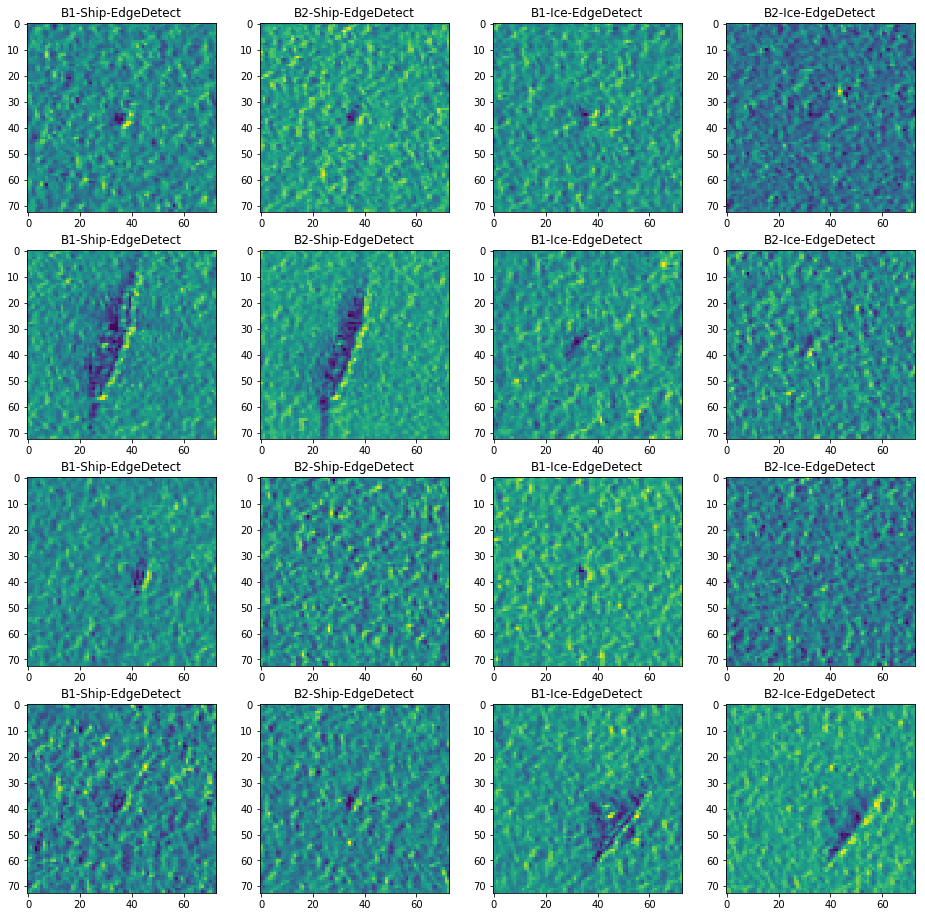

In [21]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientEdgeDetect(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-EdgeDetect')
    arr = gradientEdgeDetect(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-EdgeDetect')
    a = a+1
    arr = gradientEdgeDetect(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-EdgeDetect')
    arr = gradientEdgeDetect(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-EdgeDetect')
    

plt.show()

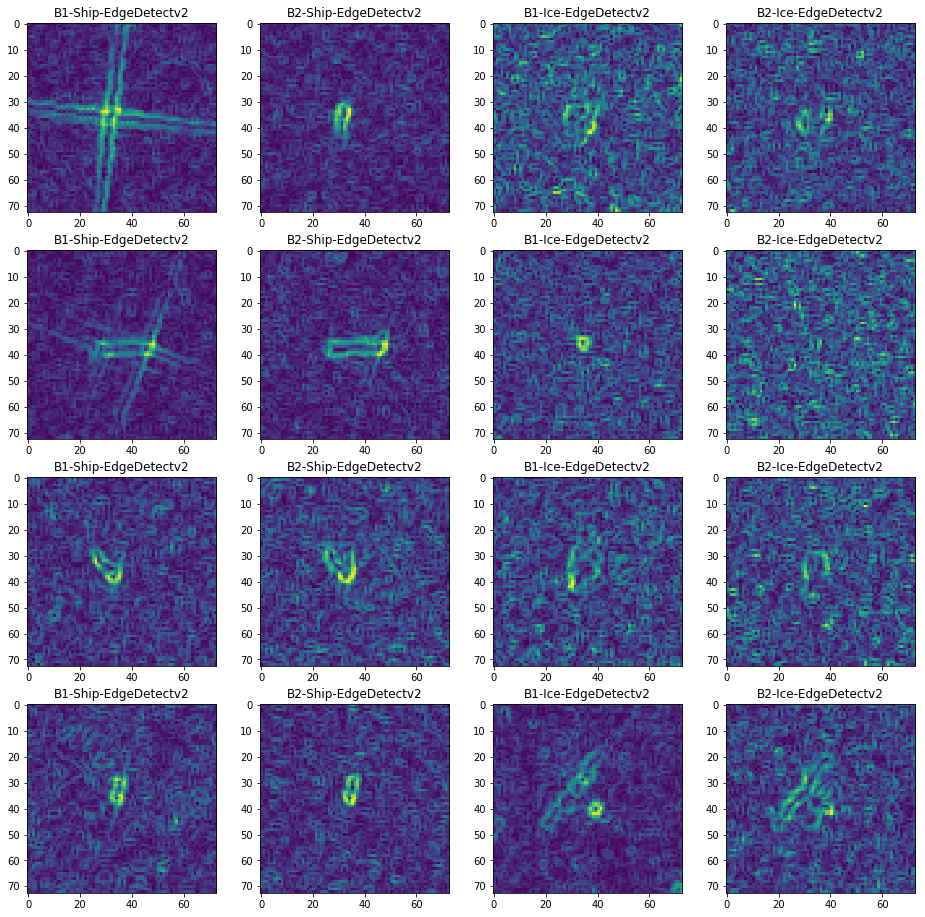

In [20]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientEdgeDetect2(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-EdgeDetectv2')
    arr = gradientEdgeDetect2(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-EdgeDetectv2')
    a = a+1
    arr = gradientEdgeDetect2(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-EdgeDetectv2')
    arr = gradientEdgeDetect2(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-EdgeDetectv2')
    

plt.show()

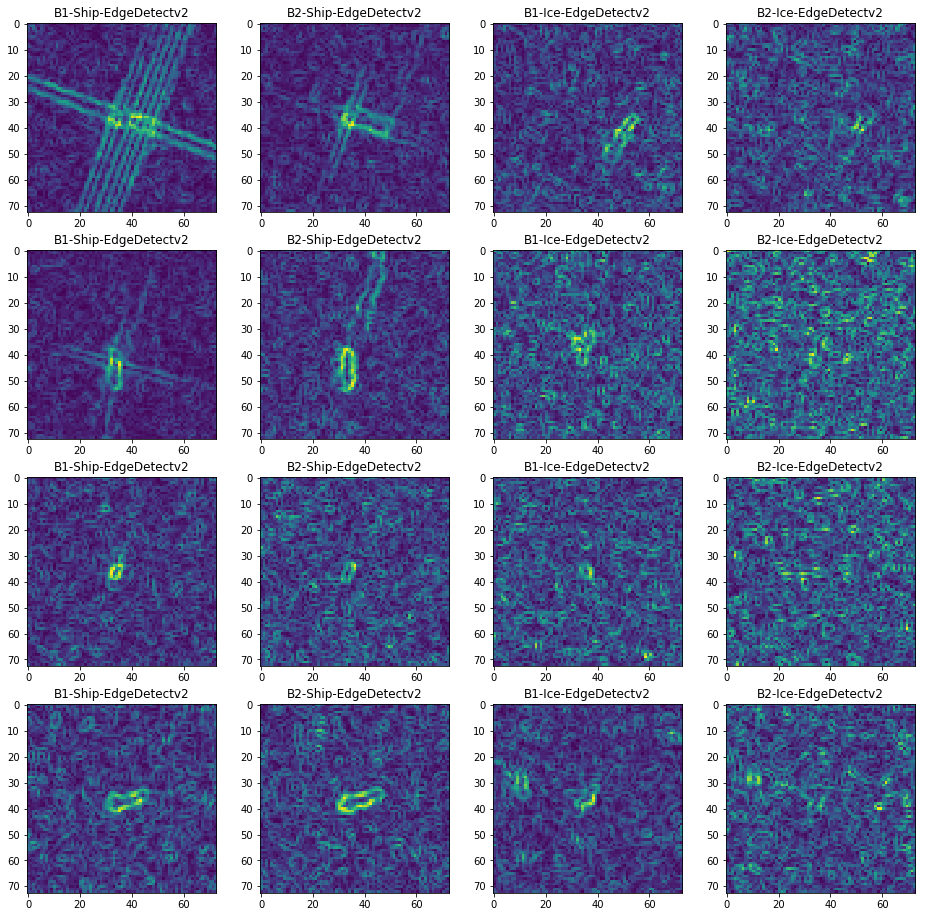

In [19]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientSobel(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Sobel')
    arr = gradientSobel(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Sobel')
    a = a+1
    arr = gradientSobel(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Sobel')
    arr = gradientSobel(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Sobel')
    

plt.show()

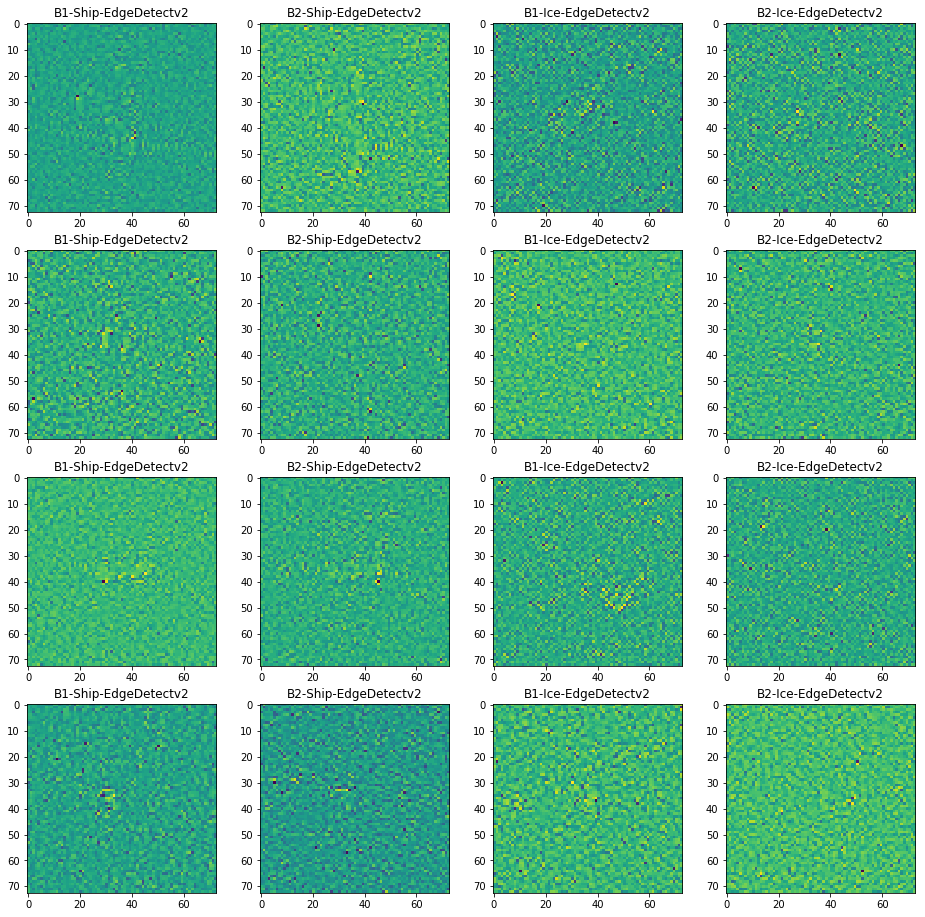

In [25]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientLaplace(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Laplace')
    arr = gradientLaplace(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Laplace')
    a = a+1
    arr = gradientLaplace(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Laplace')
    arr = gradientLaplace(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Laplace')
    

plt.show()

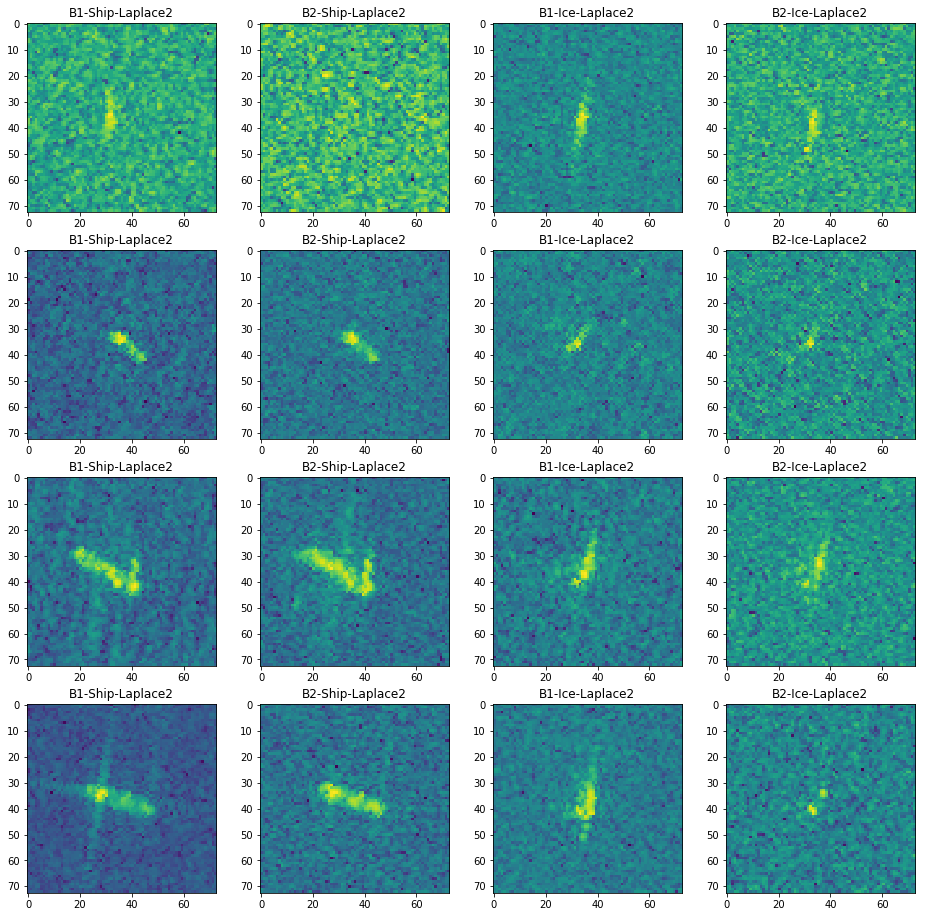

In [28]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientLaplace2(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Laplace2')
    arr = gradientLaplace2(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Laplace2')
    a = a+1
    arr = gradientLaplace2(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Laplace2')
    arr = gradientLaplace2(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Laplace2')
    

plt.show()

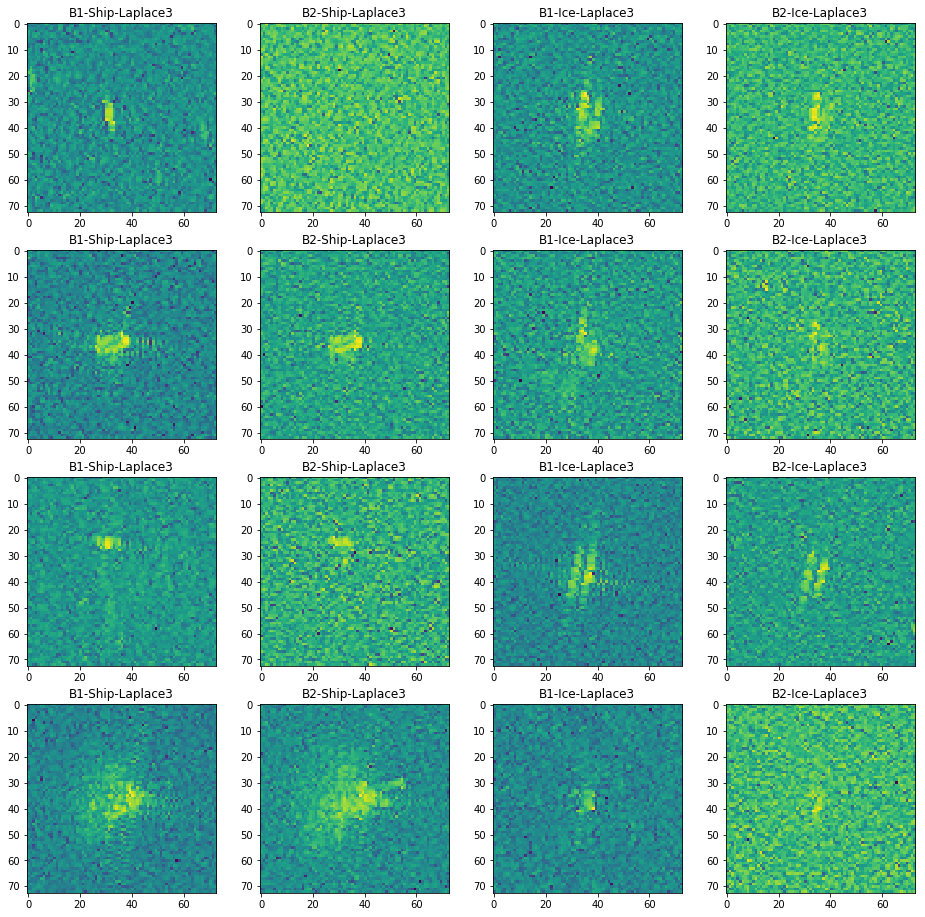

In [29]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientLaplace3(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Laplace3')
    arr = gradientLaplace3(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Laplace3')
    a = a+1
    arr = gradientLaplace3(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Laplace3')
    arr = gradientLaplace3(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Laplace3')
    

plt.show()

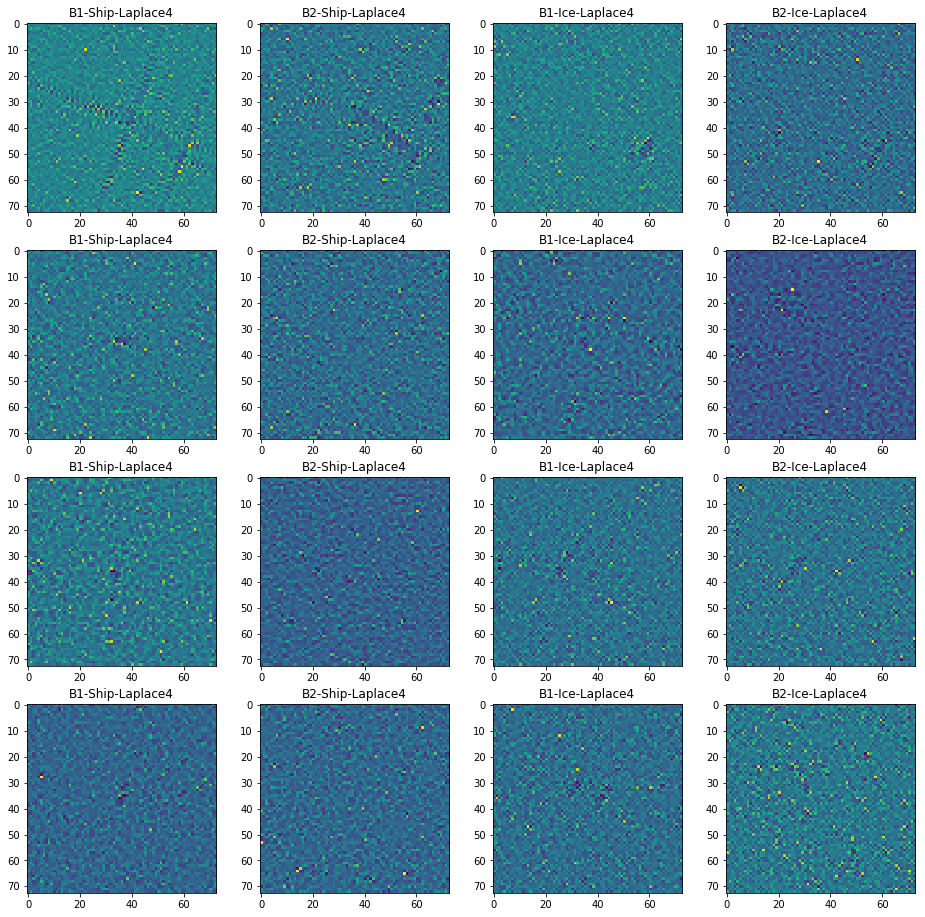

In [30]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientLaplace4(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Laplace4')
    arr = gradientLaplace4(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Laplace4')
    a = a+1
    arr = gradientLaplace4(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Laplace4')
    arr = gradientLaplace4(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Laplace4')
    

plt.show()

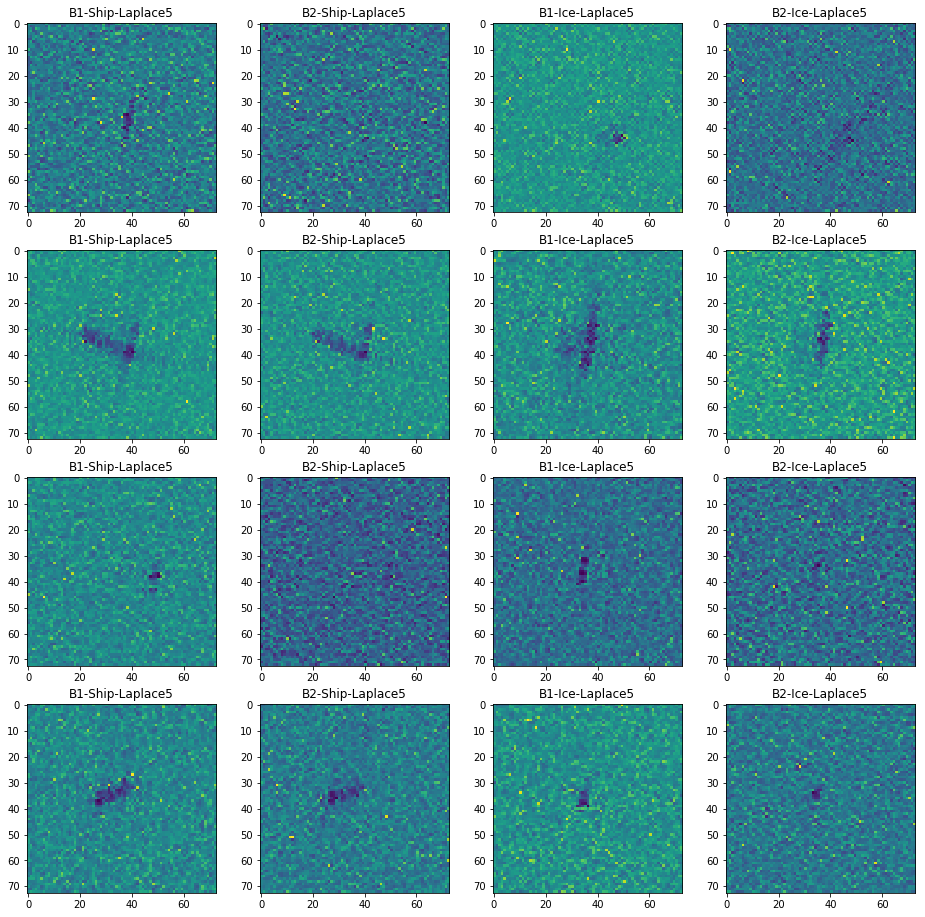

In [31]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientLaplace5(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Laplace5')
    arr = gradientLaplace5(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Laplace5')
    a = a+1
    arr = gradientLaplace5(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Laplace5')
    arr = gradientLaplace5(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Laplace5')
    

plt.show()

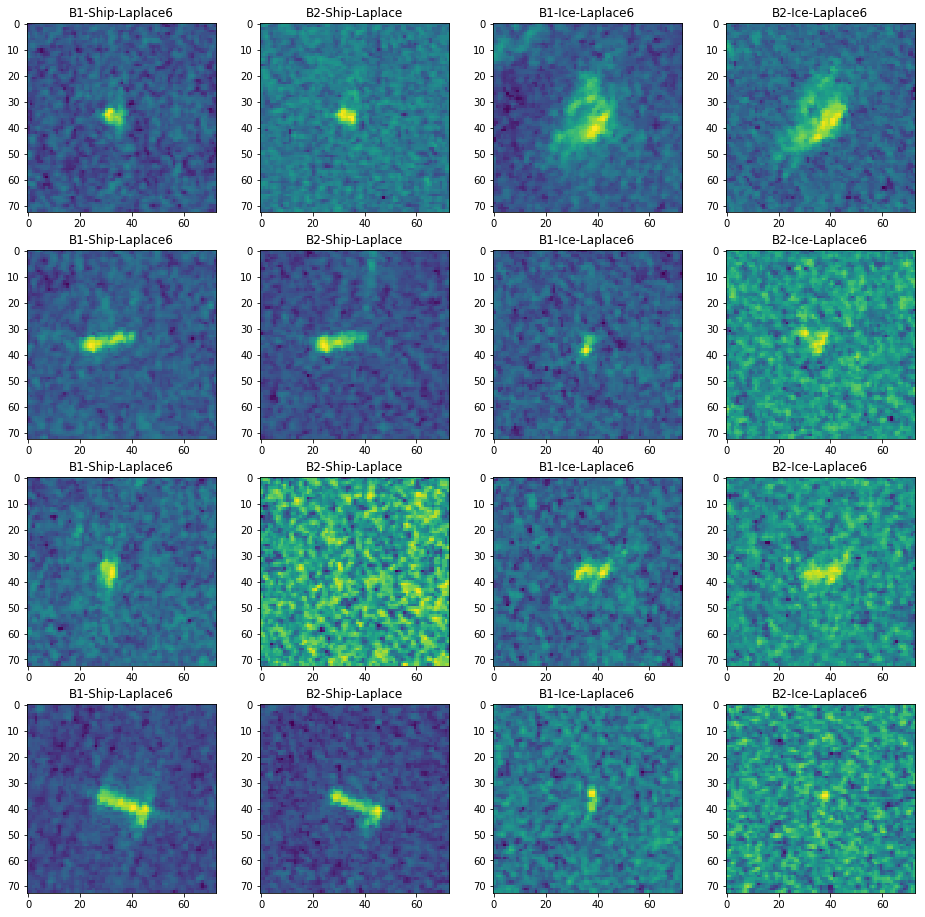

In [33]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = gradientLaplace6(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Laplace6')
    arr = gradientLaplace6(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Laplace')
    a = a+1
    arr = gradientLaplace6(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Laplace6')
    arr = gradientLaplace6(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Laplace6')
    

plt.show()

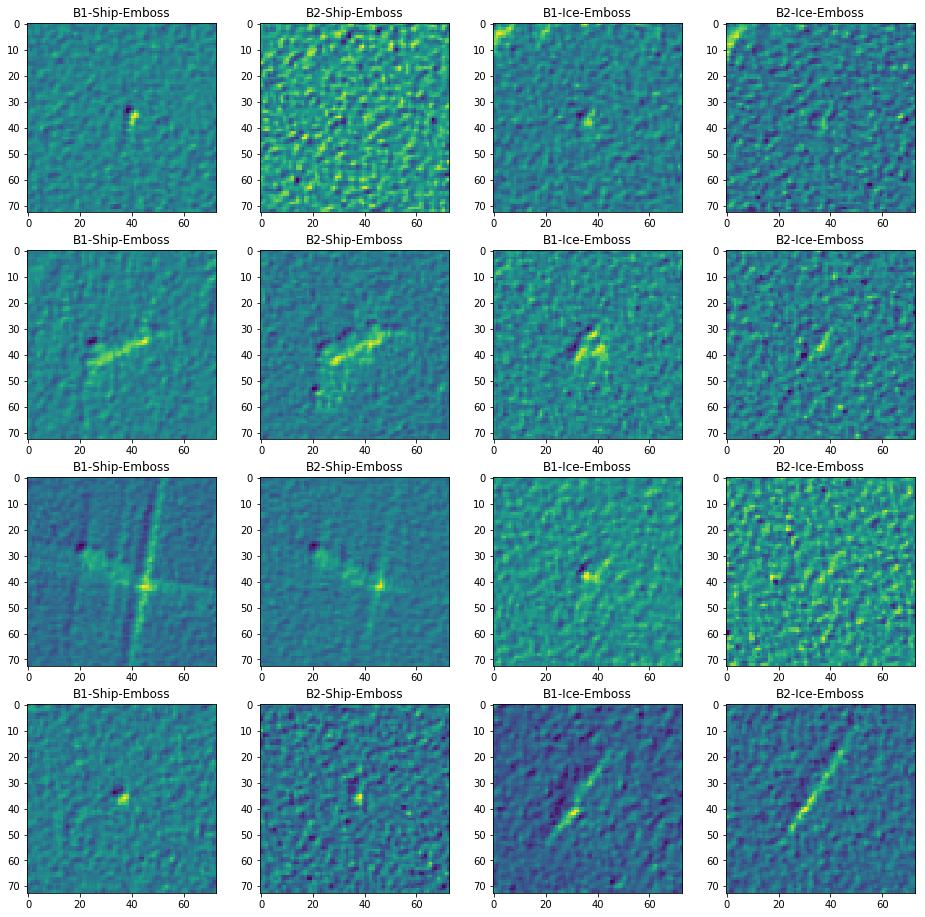

In [39]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = Emboss(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Emboss')
    arr = Emboss(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Emboss')
    a = a+1
    arr = Emboss(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Emboss')
    arr = Emboss(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Emboss')
    

plt.show()

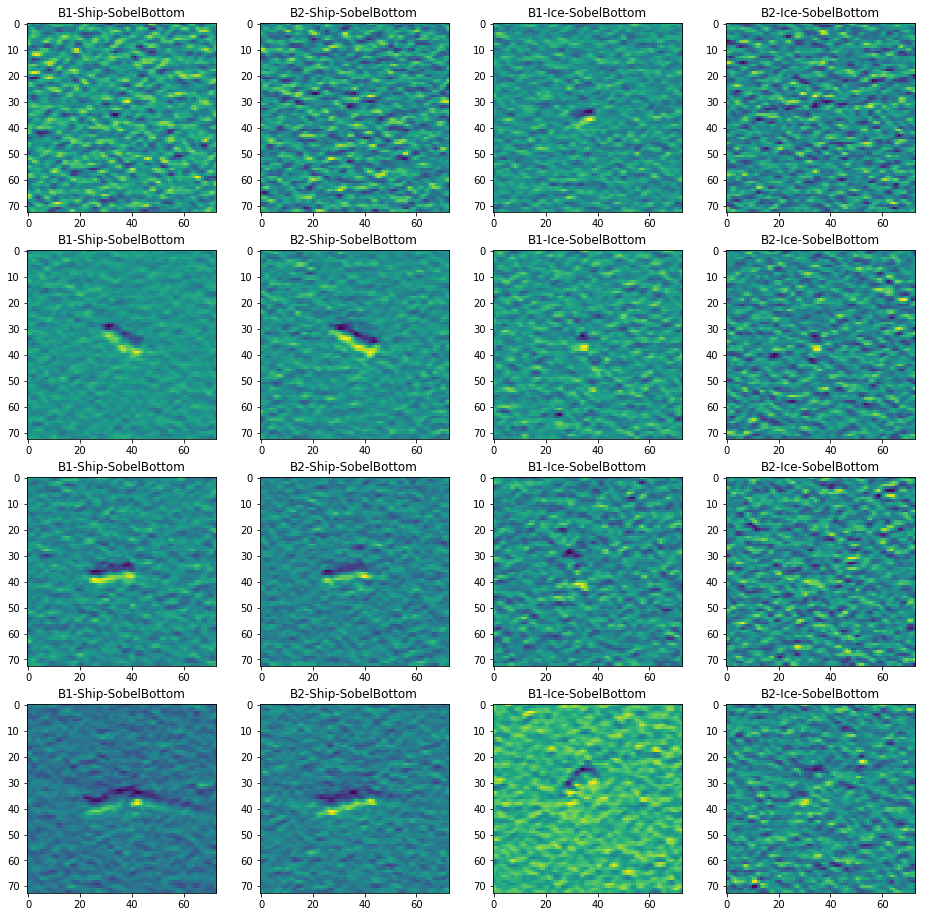

In [41]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = SobelBottom(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-SobelBottom')
    arr = SobelBottom(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-SobelBottom')
    a = a+1
    arr = SobelBottom(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-SobelBottom')
    arr = SobelBottom(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-SobelBottom')
    

plt.show()

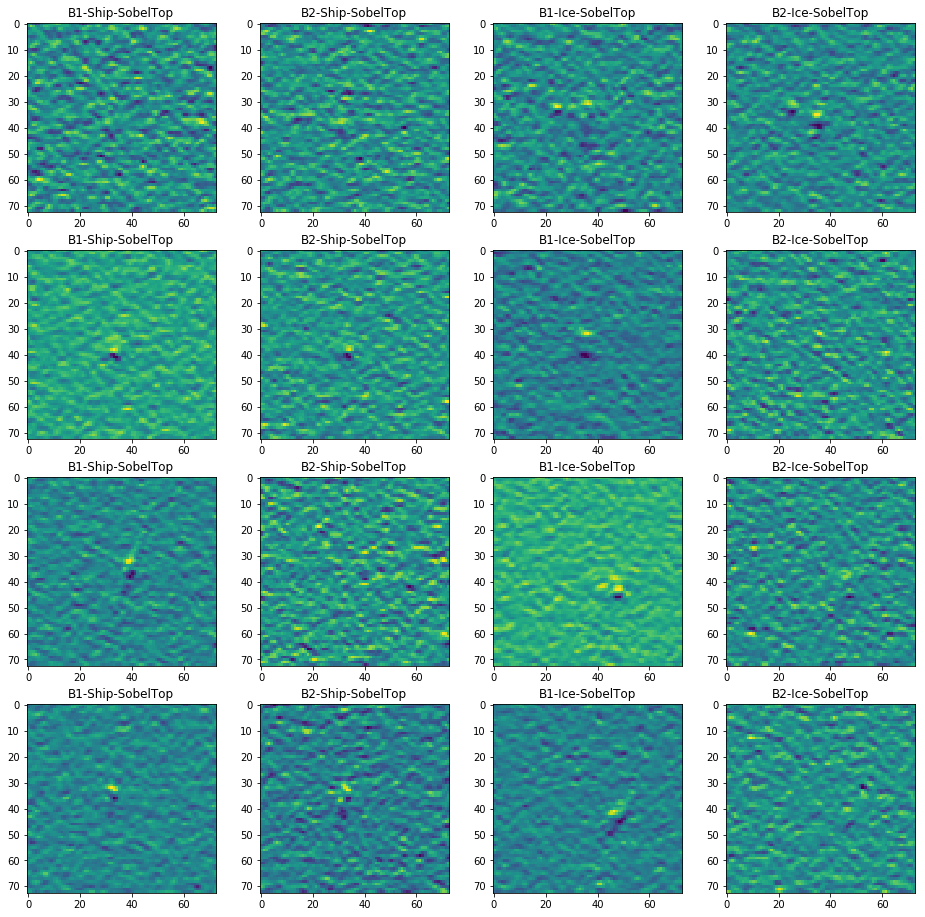

In [46]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = SobelTop(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-SobelTop')
    arr = SobelTop(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-SobelTop')
    a = a+1
    arr = SobelTop(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-SobelTop')
    arr = SobelTop(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-SobelTop')
    

plt.show()

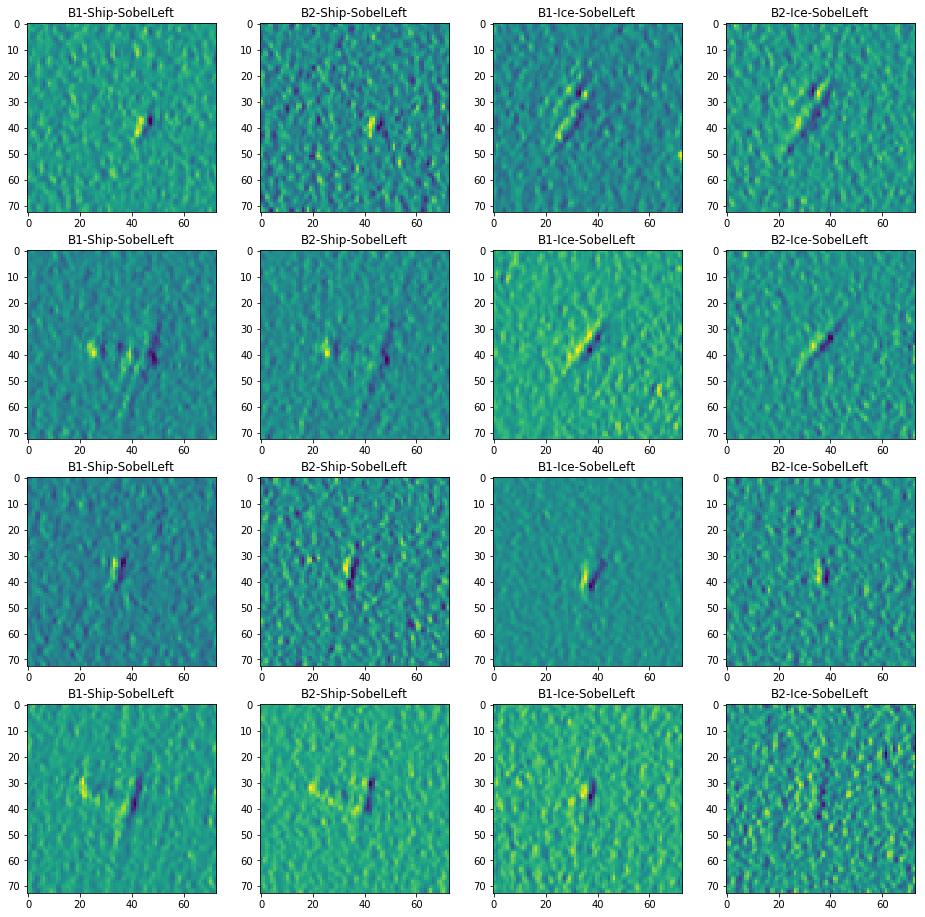

In [48]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = SobelLeft(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-SobelLeft')
    arr = SobelLeft(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-SobelLeft')
    a = a+1
    arr = SobelLeft(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-SobelLeft')
    arr = SobelLeft(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-SobelLeft')
    

plt.show()

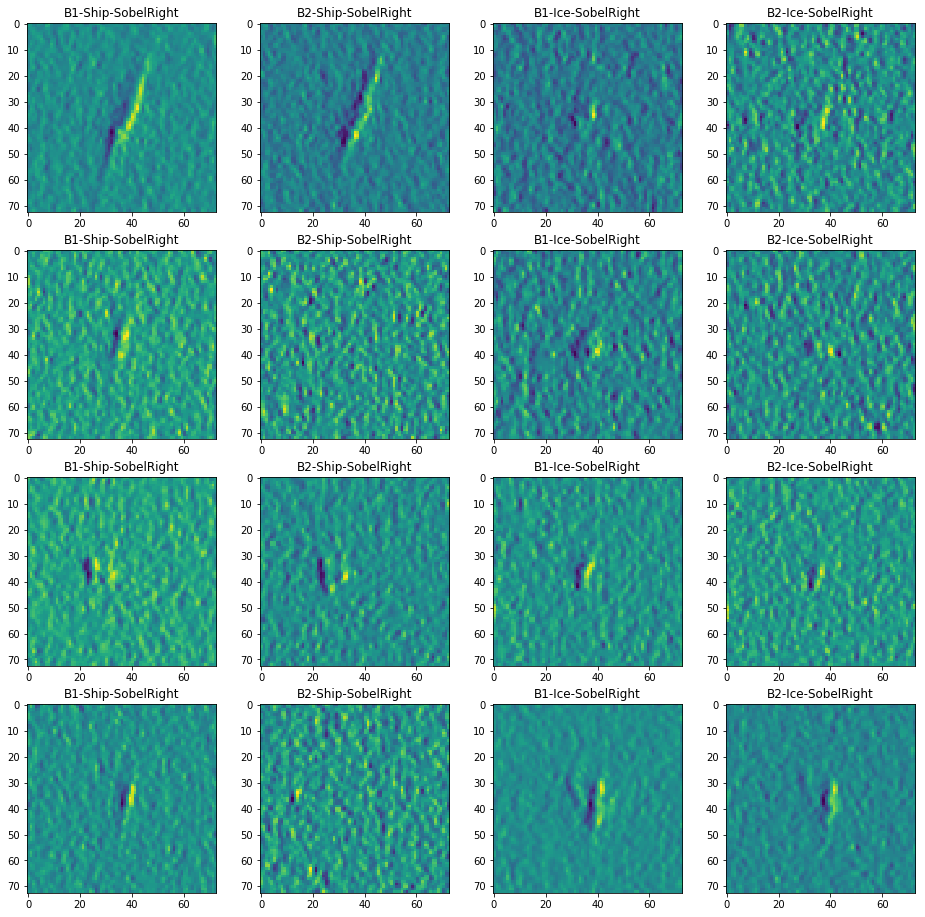

In [50]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = SobelRight(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-SobelRight')
    arr = SobelRight(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-SobelRight')
    a = a+1
    arr = SobelRight(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-SobelRight')
    arr = SobelRight(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-SobelRight')
    

plt.show()

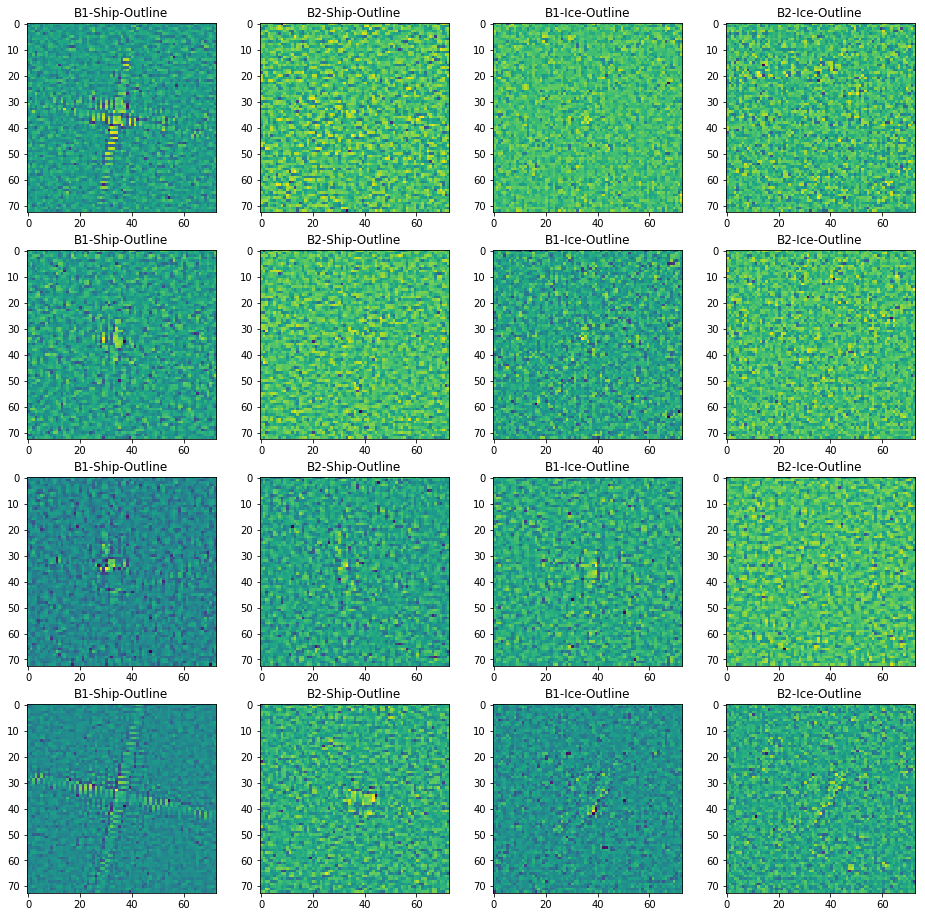

In [52]:
fig = plt.figure(1,figsize=(16,16))
ships,icebergs = sampleImg(train)
a=0
for i in range(4):
    a = a+1
    arr = outline(np.reshape(np.array(ships.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ship-Outline')
    arr = outline(np.reshape(np.array(ships.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ship-Outline')
    a = a+1
    arr = outline(np.reshape(np.array(icebergs.iloc[i,0]),(75,75)))
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B1-Ice-Outline')
    arr = outline(np.reshape(np.array(icebergs.iloc[i,1]),(75,75)))
    a=a+1
    ax = fig.add_subplot(4,4,a)
    ax.imshow(arr,cmap='viridis')
    ax.set_title('B2-Ice-Outline')
    

plt.show()